In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors
import pandas as pd
import numpy as np
from PIL import Image

Fetch the frequencies of top 100 mutations, countries and lineages in the ENA dataset.
```
select concat(gene_name, ':', hgvs_p), count(*) as count from variant_observation_on where hgvs_p is not null group by gene_name, hgvs_p order by count desc limit 100;
select pangolin_lineage, count(*) as count from sample_ena_on where pangolin_lineage is not null group by pangolin_lineage order by count desc limit 100;
select country_alpha_3, count(*) as count from sample_ena_on where country_alpha_3 != 'None' group by country_alpha_3 order by count desc limit 100;
```

In [74]:
def load_data(filename):

    data = pd.read_csv(filename, names=['thing', 'count'])
    # downsamples countries 
    # data['count'] = data[['count', 'thing']].apply(lambda x: x[0] / 3 if len(x[1]) == 3 and '.' not in x[1] else x[0], axis=1)
    # filter out countries
    data = data[data['thing'].transform(lambda x: len(x) != 3 or '.' in x)]
    # downsamples mutation counts
    data['count'] = data[['count', 'thing']].apply(lambda x: x[0] / 10 if ':p.' in x[1] else x[0], axis=1)
    # remove p. from mutations
    data['thing'] = data['thing'].transform(lambda x: x.replace(':p.', ':'))

    return data

data = load_data('wordcloud.csv')
data.head()

,thing,count
51,B.1.1.7,17519.0
52,B.1,8904.0
53,B.1.1,8838.0
54,B.1.177,8016.0
55,BA.1.1,5241.0


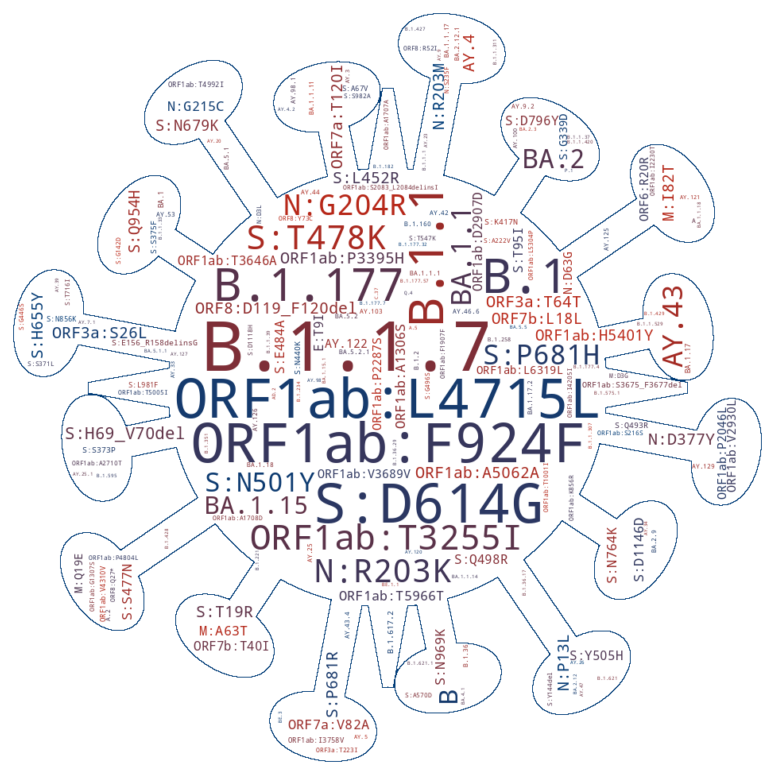

In [79]:
def plot_word_cloud(data):

    mask = np.array(Image.open("CoVigator_logo.png"))
    
    # create color map with TRON colors
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#003c78","#bd2716"])

    fig = figure(figsize=(10, 10), dpi=100)
    wc = WordCloud(
        background_color="white", 
        max_words=1000, 
        mask=mask, 
        contour_width=1, 
        contour_color="#003c78", 
        colormap=cmap, 
        prefer_horizontal=0.5)
    
    # generate word cloud
    data_dict = data.set_index('thing').to_dict().get('count')
    wc.generate_from_frequencies(data_dict)

    # show

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return fig

fig = plot_word_cloud(data)
fig.savefig('wordcloud.png', dpi=100)

Fetch the data for 2020, 2021 and 2022 separately.

```
\copy (select concat(gene_name, ':', hgvs_p), count(*) as count from variant_observation_on where hgvs_p is not null and date >= '2020-01-01' and date < '2021-01-01' group by gene_name, hgvs_p order by count desc limit 100) to 'wordcloud_mutations_2020.csv' csv;
\copy (select pangolin_lineage, count(*) as count from sample_ena_on where pangolin_lineage is not null  and collection_date >= '2020-01-01' and collection_date < '2021-01-01' group by pangolin_lineage order by count desc limit 100) to 'wordcloud_lineages_2020.csv' csv;

\copy (select concat(gene_name, ':', hgvs_p), count(*) as count from variant_observation_on where hgvs_p is not null and date >= '2021-01-01' and date < '2022-01-01' group by gene_name, hgvs_p order by count desc limit 100) to 'wordcloud_mutations_2021.csv' csv;
\copy (select pangolin_lineage, count(*) as count from sample_ena_on where pangolin_lineage is not null  and collection_date >= '2021-01-01' and collection_date < '2022-01-01' group by pangolin_lineage order by count desc limit 100) to 'wordcloud_lineages_2021.csv' csv;

\copy (select concat(gene_name, ':', hgvs_p), count(*) as count from variant_observation_on where hgvs_p is not null and date >= '2022-01-01' and date < '2023-01-01' group by gene_name, hgvs_p order by count desc limit 100) to 'wordcloud_mutations_2022.csv' csv;
\copy (select pangolin_lineage, count(*) as count from sample_ena_on where pangolin_lineage is not null  and collection_date >= '2022-01-01' and collection_date < '2023-01-01' group by pangolin_lineage order by count desc limit 100) to 'wordcloud_lineages_2022.csv' csv;
```

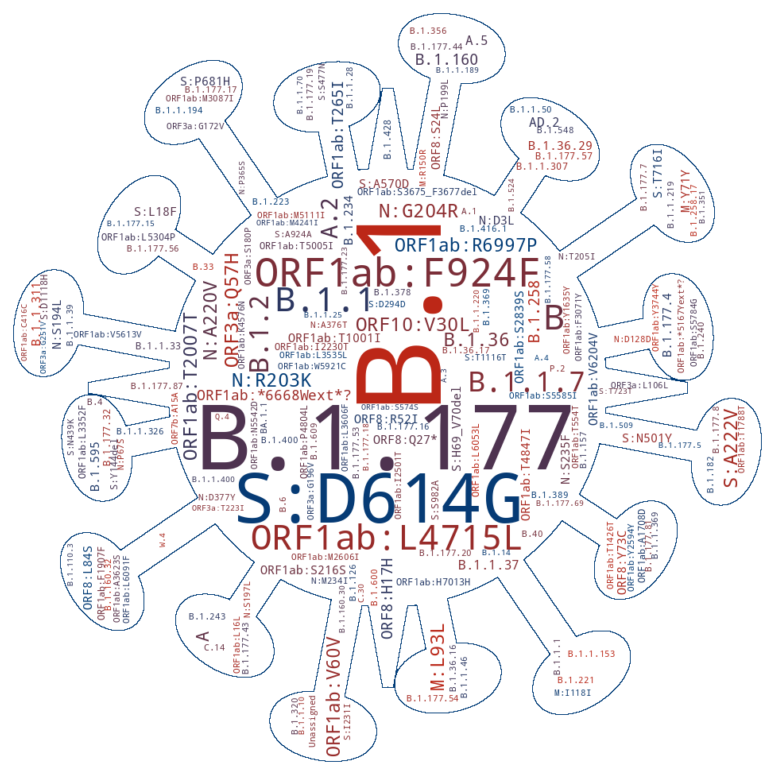

In [80]:
data_2020 = load_data('wordcloud_2020.csv')
fig_2020 = plot_word_cloud(data_2020)
fig_2020.savefig('wordcloud_2020.png', dpi=100)

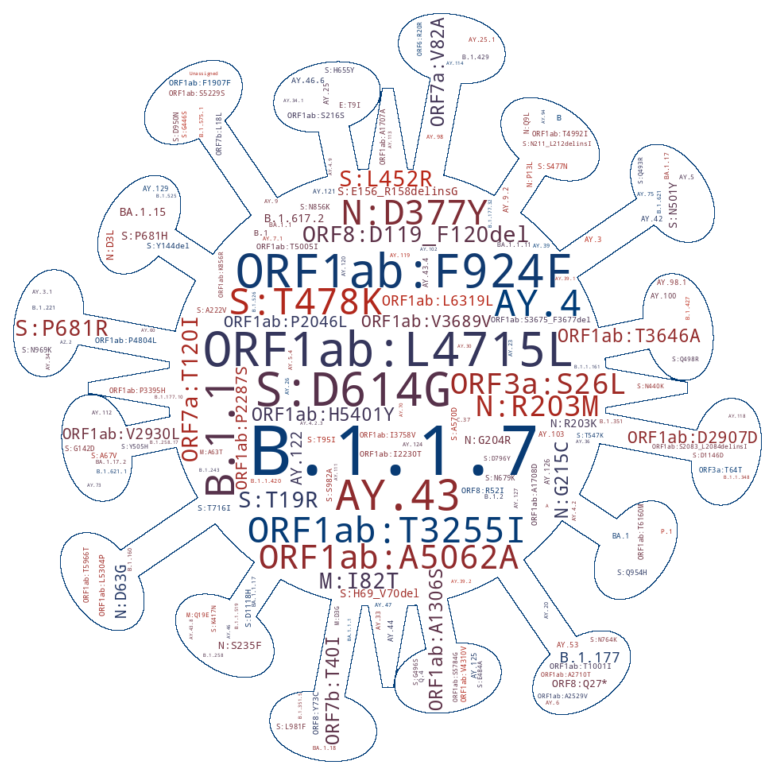

In [81]:
data_2021 = load_data('wordcloud_2021.csv')
fig_2021 = plot_word_cloud(data_2021)
fig_2021.savefig('wordcloud_2021.png', dpi=100)

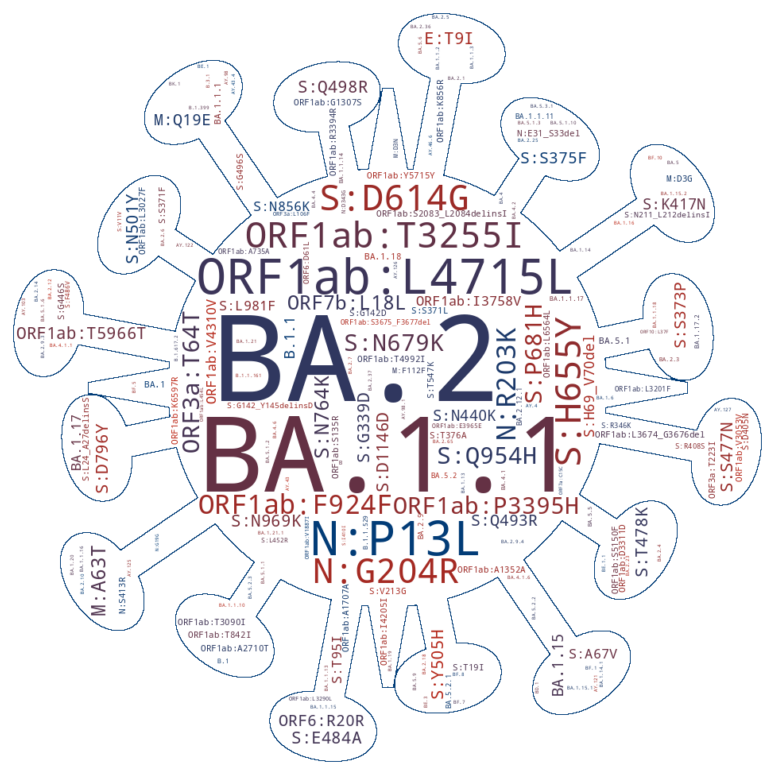

In [82]:
data_2022 = load_data('wordcloud_2022.csv')
fig_2022 = plot_word_cloud(data_2022)
fig_2022.savefig('wordcloud_2022.png', dpi=100)